In [1]:
import pandas as pd

In [3]:
dataset=pd.read_csv("insurance_pre.csv")

In [5]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [7]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [9]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [13]:
Independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
Independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [15]:
Dependent=dataset[['charges']]
Dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Independent,Dependent,test_size=0.30,random_state=0)

In [176]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error', splitter='best',max_features='log2')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_features='log2')

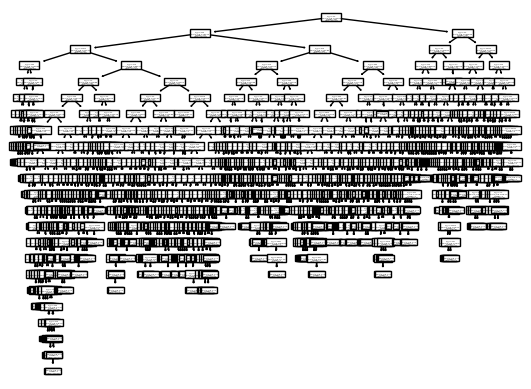

In [175]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [177]:
y_pred=regressor.predict(x_test) #(.predict->defined function)
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)
print("{:.5f}".format(r_score))

0.64464
